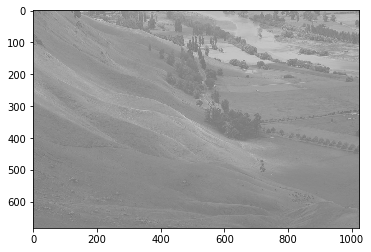

In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg', 0)
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg')
hist,bins = np.histogram(img.flatten(), 256, [0,256]) 
plt.imshow(img)

There are 28701 pixels has intensity value 137


<Container object of 256 artists>

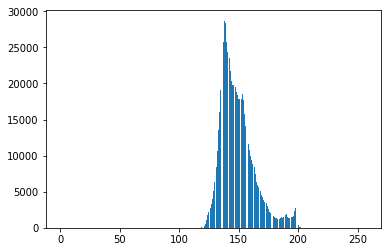

In [66]:
print("There are {} pixels has intensity value {}".format(hist.max(), hist.argmax()))
plt.bar(bins[1:], hist)

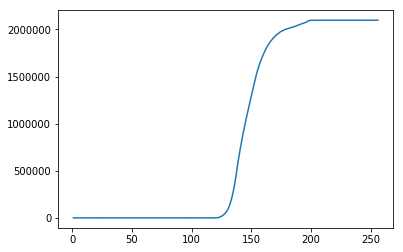

In [87]:
cdf = hist.cumsum()
plt.plot(bins[1:], cdf)

In [68]:
cdf_normalized = cdf * hist.max()/cdf.max()

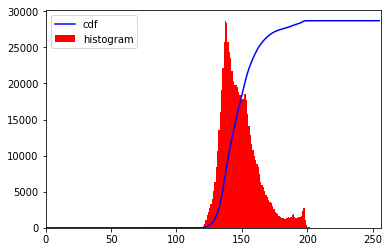

In [69]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [80]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf2 = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf2[img]

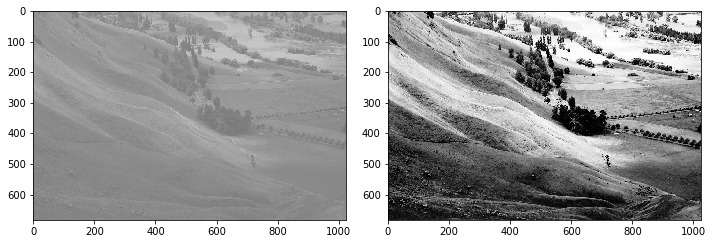

In [86]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), nrows=1, ncols=2)
fig.tight_layout()
ax1.imshow(img)
ax2.imshow(img2)

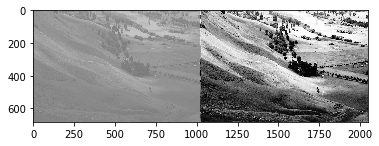

In [89]:
# img = cv2.imread('wiki.jpg')
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
cv2.imwrite('res.png',res)
plt.imshow(res, cmap='gray')

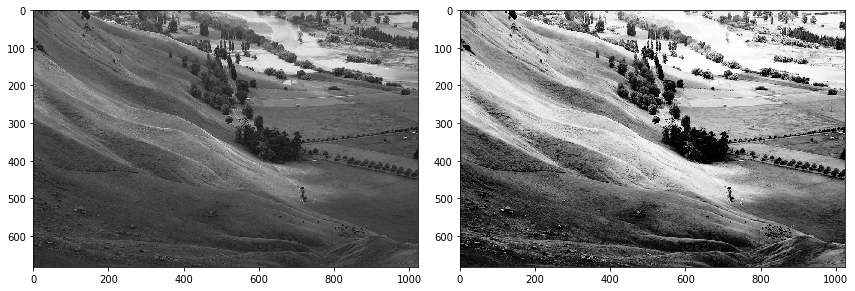

In [91]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,12), nrows=1, ncols=2)
fig.tight_layout()
ax1.imshow(img, cmap='gray')
ax2.imshow(equ, cmap='gray')